In [1]:
import json
from pathlib import Path

import awkward as ak
import numpy as np
import hist
import mplhep as hep
import matplotlib.pyplot as plt

from data_processing import process_data

In [2]:
SIGNAL_FILEPATHS = [
    # '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/output_ttHKiller_eval_postEE/GluGluToHH_nominal_ttH_killer_preds.parquet',
    # '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/output_ttHKiller_eval_preEE/GluGluToHH_nominal_ttH_killer_preds.parquet'
    # '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/ttHKiller_eval_outputs/output_ttHKiller_eval_postEE_sort/GluGluToHH_nominal_ttH_killer_preds.parquet',
    # '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/ttHKiller_eval_outputs/output_ttHKiller_eval_preEE_sort/GluGluToHH_nominal_ttH_killer_preds.parquet'
    '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/ttHKiller_eval_outputs/output_ttHKiller_eval_postEE_unsort/GluGluToHH_nominal_ttH_killer_preds.parquet',
    '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/ttHKiller_eval_outputs/output_ttHKiller_eval_preEE_unsort/GluGluToHH_nominal_ttH_killer_preds.parquet'
]
BKG_FILEPATHS = [
    # '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/output_ttHKiller_eval_postEE/ttHToGG_nominal_ttH_killer_preds.parquet',
    # '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/output_ttHKiller_eval_preEE/ttHToGG_nominal_ttH_killer_preds.parquet'
    # '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/ttHKiller_eval_outputs/output_ttHKiller_eval_postEE_sort/ttHToGG_nominal_ttH_killer_preds.parquet',
    # '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/ttHKiller_eval_outputs/output_ttHKiller_eval_preEE_sort/ttHToGG_nominal_ttH_killer_preds.parquet'
    '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/ttHKiller_eval_outputs/output_ttHKiller_eval_postEE_unsort/ttHToGG_nominal_ttH_killer_preds.parquet',
    '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/ttHKiller_eval_outputs/output_ttHKiller_eval_preEE_unsort/ttHToGG_nominal_ttH_killer_preds.parquet'
]

sig_samples_list = [ak.from_parquet(sig_filepath) for sig_filepath in SIGNAL_FILEPATHS]
sig_sample = ak.concatenate(sig_samples_list)
bkg_samples_list = [ak.from_parquet(bkg_filepath) for bkg_filepath in BKG_FILEPATHS]
bkg_sample = ak.concatenate(bkg_samples_list)

In [3]:
CURRENT_DIRPATH = str(Path().absolute())
VERSION = 'v10'
VARS = 'extra_vars+max'
# CURRENT_TIME = '2024-10-29_00-47-20'
CURRENT_TIME = '2024-11-20_18-34-50'
OUTPUT_DIRPATH = CURRENT_DIRPATH + f"/model_outputs/{VERSION}/{VARS}/" + CURRENT_TIME
SEED = 21
MOD_VALS = (5, 5)

(
    data_df_dict, data_test_df_dict, 
    data_list_dict, data_hlf_dict, label_dict, 
    data_list_test_dict, data_hlf_test_dict, label_test_dict, 
    high_level_fields_dict, input_hlf_vars_dict, hlf_vars_columns_dict,
    data_aux_dict, data_test_aux_dict
) = process_data(
    6, 7, SIGNAL_FILEPATHS, BKG_FILEPATHS, OUTPUT_DIRPATH, seed=SEED, mod_vals=MOD_VALS, k_fold_test=True, std_json_dirpath='/uscms/home/tsievert/nobackup/XHYbbgg/tth-killer-eval/model_files'
)

Data list: (413735, 6, 7)
Data HLF: (413735, 15)
n signal = 136530, n bkg = 277205
Data list test: (103521, 6, 7)
Data HLF test: (103521, 15)
n signal = 34224, n bkg = 69297
Data list: (413918, 6, 7)
Data HLF: (413918, 15)
n signal = 136466, n bkg = 277452
Data list test: (103338, 6, 7)
Data HLF test: (103338, 15)
n signal = 34288, n bkg = 69050
Data list: (413265, 6, 7)
Data HLF: (413265, 15)
n signal = 136638, n bkg = 276627
Data list test: (103991, 6, 7)
Data HLF test: (103991, 15)
n signal = 34116, n bkg = 69875
Data list: (413725, 6, 7)
Data HLF: (413725, 15)
n signal = 136671, n bkg = 277054
Data list test: (103531, 6, 7)
Data HLF test: (103531, 15)
n signal = 34083, n bkg = 69448
Data list: (414381, 6, 7)
Data HLF: (414381, 15)
n signal = 136711, n bkg = 277670
Data list test: (102875, 6, 7)
Data HLF test: (102875, 15)
n signal = 34043, n bkg = 68832


In [4]:

def plot_score_from_IN_perf(weights, n_bins=50):
    with open(
        # '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/model_outputs/v10/extra_vars+max/2024-10-29_00-47-20/2024-10-29_00-47-20_IN_perf.json', 'r'
        '/uscms/home/tsievert/nobackup/XHYbbgg/HHtobbyy/model_outputs/v10/extra_vars+max/2024-11-20_18-34-50/2024-11-20_18-34-50_IN_perf.json', 'r'
    ) as f:
        IN_info = json.load(f)

    flat_preds = np.concatenate([
        np.exp(IN_info['all_preds'][i])[:, 1] for i in range(len(IN_info['all_preds']))
    ], axis=None)
    flat_labels = np.concatenate([
        np.array(IN_info['all_labels'][i]) for i in range(len(IN_info['all_preds']))
    ], axis=None)
    sig_preds = flat_preds[flat_labels == 1]
    bkg_preds = flat_preds[flat_labels == 0]

    hist_axis = hist.axis.Regular(n_bins, 0., 1., name='var', growth=False, underflow=False, overflow=False)
    sig_hist = hist.Hist(hist_axis, storage='weight').fill(var=sig_preds, weight=weights['sig'] if weights['sig'] is not None else np.ones_like(sig_preds))
    bkg_hist = hist.Hist(hist_axis, storage='weight').fill(var=bkg_preds, weight=weights['bkg'] if weights['bkg'] is not None else np.ones_like(bkg_preds))
    hep.histplot(
        [sig_hist, bkg_hist],
        yerr=(True if weights['sig'] is not None else False),
        alpha=0.5, density=(False if weights['sig'] is not None else True), histtype='step',
        label=["ggF HH", "ttH"], linestyle=['solid', 'solid'], color=['blue', 'red']
    )

def plot_score_from_eval(samples, weights, n_bins=50, bkg_label='ttH', no_sig=False):
    sig_preds = ak.to_numpy(samples['sig']['ttH_killer_preds'])
    bkg_preds = ak.to_numpy(samples['bkg']['ttH_killer_preds'])
    
    # rng = np.random.default_rng(seed=21)
    # sig_preds = rng.permutation(sig_preds)
    # bkg_preds = rng.permutation(bkg_preds)

    hist_axis = hist.axis.Regular(n_bins, 0., 1., name='var', growth=False, underflow=False, overflow=False)
    if not no_sig:
        sig_hist = hist.Hist(hist_axis, storage='weight').fill(var=sig_preds, weight=weights['sig'] if weights['sig'] is not None else np.ones_like(sig_preds))
        bkg_hist = hist.Hist(hist_axis, storage='weight').fill(var=bkg_preds, weight=weights['bkg'] if weights['bkg'] is not None else np.ones_like(bkg_preds))
        hep.histplot(
            [sig_hist, bkg_hist],
            yerr=(True if weights['sig'] is not None else False),
            alpha=0.5, density=(False if weights['sig'] is not None else True), histtype='step',
            label=["ggF HH", bkg_label], linestyle=['dashed', 'dashed'], color=['yellow', 'green']
        )
    else:
        bkg_hist = hist.Hist(hist_axis, storage='weight').fill(var=bkg_preds, weight=weights['bkg'] if weights['bkg'] is not None else np.ones_like(bkg_preds))
        hep.histplot(
            [bkg_hist],
            yerr=(True if weights['sig'] is not None else False),
            alpha=0.5, density=(False if weights['sig'] is not None else True), histtype='step',
            label=[bkg_label], linestyle=['dashed']
        )

In [5]:
IN_weights = {'sig': [], 'bkg': []}
for fold_idx in range(len(data_test_aux_dict)):
    IN_weights['sig'].append(
        (
            data_test_aux_dict[f'fold_{fold_idx}'].loc[:, "eventWeight"].to_numpy()
        )[label_test_dict[f'fold_{fold_idx}'] == 1]
    )
    IN_weights['bkg'].append(
        (
            data_test_aux_dict[f'fold_{fold_idx}'].loc[:, "eventWeight"].to_numpy()
        )[label_test_dict[f'fold_{fold_idx}'] == 0]
    )
IN_weights['sig'] = np.concatenate(IN_weights['sig'])
IN_weights['bkg'] = np.concatenate(IN_weights['bkg'])

weights = {'sig': ak.to_numpy(sig_sample['eventWeight']), 'bkg': ak.to_numpy(bkg_sample['eventWeight'])}
samples = {'sig': sig_sample, 'bkg': bkg_sample}


In [43]:
# data_test_aux_dict['fold_0'].head()
# data_test_aux_dict['fold_0'].loc[data_test_aux_dict['fold_0']['event'] == 276800, 'eventWeight']

print(
    np.unique(data_test_aux_dict['fold_0'].loc[label_test_dict['fold_0'] == 0, 'eventWeight'].to_numpy())
)



[-0.00014245 -0.0001316   0.0001316   0.00014245]


In [44]:
# print(samples['sig']['eventWeight'][samples['sig']['event'] == 276800])
# print(samples['bkg']['eventWeight'][samples['bkg']['event'] == 276800])

print(np.unique(samples['bkg']['eventWeight']))

[-0.000142, -0.000132, 0.000132, 0.000142]


In [ ]:
print(samples['bkg']['ttH_killer_preds'])
print(samples['bkg']['event'])
print('-'*60)
print(samples['sig']['ttH_killer_preds'])
print(samples['sig']['event'])

[0.299, 0.00507, 0.952, 0.512, 0.0031, 0.147, ... 0.579, 0.0278, 0.142, 0.103, 0.335]
[288994, 288993, 289006, 289015, 289007, ... 250977, 250983, 251000, 250988, 250990]
------------------------------------------------------------
[1, 1, 0.967, 0.432, 0.986, 0.57, ... 0.934, 0.987, 0.925, 0.0142, 0.972, 0.395]
[2733, 2737, 2741, 2735, 2747, 2744, ... 110282, 110280, 110281, 110285, 110279]


In [45]:
print(samples['bkg']['ttH_killer_preds'])
print(samples['bkg']['event'])
print('-'*60)
print(samples['sig']['ttH_killer_preds'])
print(samples['sig']['event'])

[0.0488, 0.00353, 0.43, 0.052, 0.0216, ... 0.0554, 0.155, 0.55, 0.34, 0.000495]
[288994, 288993, 289006, 289015, 289007, ... 250977, 250983, 251000, 250988, 250990]
------------------------------------------------------------
[0.944, 0.995, 0.995, 0.919, 0.991, 0.902, ... 0.993, 0.989, 0.164, 0.558, 0.883]
[2733, 2737, 2741, 2735, 2747, 2744, ... 110282, 110280, 110281, 110285, 110279]


In [46]:
arr1 = np.array([2, 3, 1, 4, 5])

arr2 = np.array([6, 9, 10, 8, 7])

arr1_sort = np.argsort(arr1)
print(arr1[arr1_sort])

arr2_sort = np.argsort(arr2)
print(arr2[arr2_sort])

print(arr1[arr1_sort][np.argsort(arr2_sort)])
print(f"correct order = {[1, 4, 5, 3, 2]}")

[1 2 3 4 5]
[ 6  7  8  9 10]
[1 4 5 3 2]
correct order = [1, 4, 5, 3, 2]


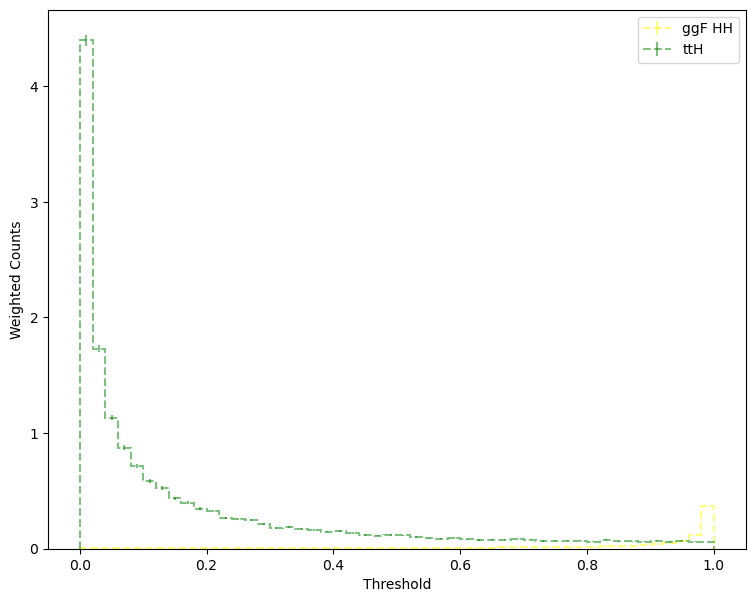

In [6]:
plt.figure(figsize=(9,7))

# plot_score_from_IN_perf(IN_weights)
plot_score_from_eval(samples, weights)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Threshold')
plt.ylabel('Weighted Counts')
plt.show()

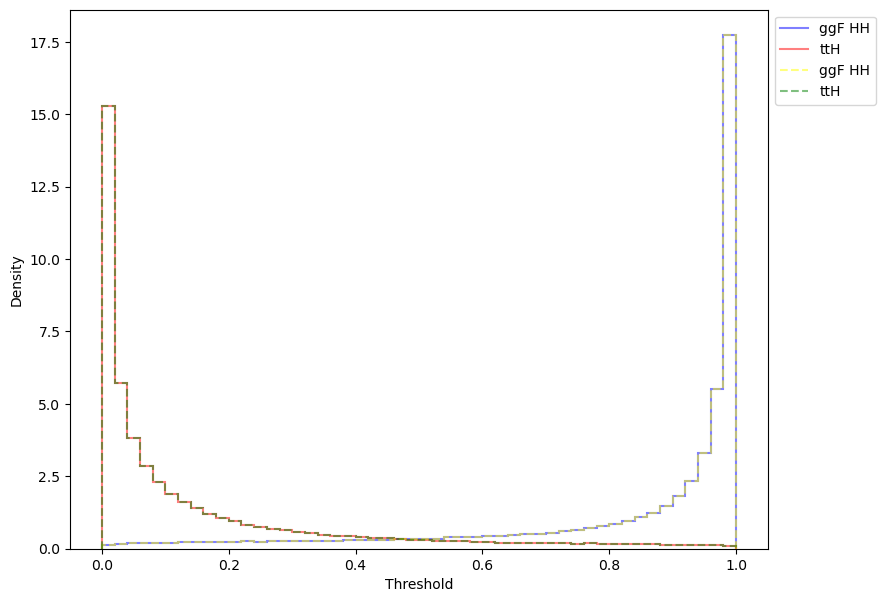

In [48]:
density_weights = {'sig': None, 'bkg': None}

plt.figure(figsize=(9,7))

# plot_score_from_IN_perf(density_weights)
plot_score_from_eval(samples, density_weights)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Threshold')
plt.ylabel('Density')
plt.show()

In [14]:
# VH performance

VH_FILEPATHS = [
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/preEE/VHToGG/nominal/VHToGG_nominal_ttH_killer_preds.parquet',
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/postEE/VHToGG/nominal/VHToGG_nominal_ttH_killer_preds.parquet'
]
GGFH_FILEPATHS = [
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/preEE/GluGluHToGG/nominal/GluGluHToGG_nominal_ttH_killer_preds.parquet',
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/postEE/GluGluHToGG/nominal/GluGluHToGG_nominal_ttH_killer_preds.parquet'
]
VBFH_FILEPATHS = [
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/preEE/VBFHToGG/nominal/VBFHToGG_nominal_ttH_killer_preds.parquet',
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/postEE/VBFHToGG/nominal/VBFHToGG_nominal_ttH_killer_preds.parquet'
]
GJET_FILEPATHS = [
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/preEE/GJetPt20To40/nominal/GJetPt20To40_nominal_ttH_killer_preds.parquet',
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/preEE/GJetPt40/nominal/GJetPt40_nominal_ttH_killer_preds.parquet',
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/postEE/GJetPt20To40/nominal/GJetPt20To40_nominal_ttH_killer_preds.parquet',
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/postEE/GJetPt40/nominal/GJetPt40_nominal_ttH_killer_preds.parquet'
]
GGJET_FILEPATHS = [
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/preEE/GGJets/nominal/GGJets_nominal_ttH_killer_preds.parquet',
    '/uscms/home/tsievert/nobackup/XHYbbgg/tth_killer_eval_all/postEE/GGJets/nominal/GGJets_nominal_ttH_killer_preds.parquet',
]

vh_samples_list = [ak.from_parquet(filepath) for filepath in VH_FILEPATHS]
vh_sample = ak.concatenate(vh_samples_list)
vh_sig = {'sig': sig_sample, 'bkg': vh_sample}
vh_weights = {'sig': ak.to_numpy(sig_sample['eventWeight']), 'bkg': ak.to_numpy(vh_sample['eventWeight'])}

ggfh_samples_list = [ak.from_parquet(filepath) for filepath in GGFH_FILEPATHS]
ggfh_sample = ak.concatenate(ggfh_samples_list)
ggfh_sig = {'sig': sig_sample, 'bkg': ggfh_sample}
ggfh_weights = {'sig': ak.to_numpy(sig_sample['eventWeight']), 'bkg': ak.to_numpy(ggfh_sample['eventWeight'])}

vbfh_samples_list = [ak.from_parquet(filepath) for filepath in VBFH_FILEPATHS]
vbfh_sample = ak.concatenate(vbfh_samples_list)
vbfh_sig = {'sig': sig_sample, 'bkg': vbfh_sample}
vbfh_weights = {'sig': ak.to_numpy(sig_sample['eventWeight']), 'bkg': ak.to_numpy(vbfh_sample['eventWeight'])}

gjet_samples_list = [ak.from_parquet(filepath) for filepath in GJET_FILEPATHS]
gjet_sample = ak.concatenate(gjet_samples_list)
gjet_sig = {'sig': sig_sample, 'bkg': gjet_sample}
gjet_weights = {'sig': ak.to_numpy(sig_sample['eventWeight']), 'bkg': ak.to_numpy(gjet_sample['eventWeight'])}

ggjet_samples_list = [ak.from_parquet(filepath) for filepath in GGJET_FILEPATHS]
ggjet_sample = ak.concatenate(ggjet_samples_list)
ggjet_sig = {'sig': sig_sample, 'bkg': ggjet_sample}
ggjet_weights = {'sig': ak.to_numpy(sig_sample['eventWeight']), 'bkg': ak.to_numpy(ggjet_sample['eventWeight'])}

all_samples = {
    'ggF HH': sig_sample,
    'ttH': bkg_sample,
    'VH': vh_sample,
    'ggF H': ggfh_sample,
    'VBF H': vbfh_sample,
    'GJet': gjet_sample,
    'GGJet': ggjet_sample,
}
all_weights = {
    'ggF HH': ak.to_numpy(sig_sample['eventWeight']),
    'ttH': ak.to_numpy(bkg_sample['eventWeight']),
    'VH': ak.to_numpy(vh_sample['eventWeight']),
    'ggF H': ak.to_numpy(ggfh_sample['eventWeight']),
    'VBF H': ak.to_numpy(vbfh_sample['eventWeight']),
    'GJet': ak.to_numpy(gjet_sample['eventWeight']),
    'GGJet': ak.to_numpy(ggjet_sample['eventWeight']),
}

In [15]:
def plot_score_from_eval_all(samples, weights, n_bins=50):
    hist_axis = hist.axis.Regular(n_bins, 0., 1., name='var', growth=False, underflow=False, overflow=False)

    hist_list, label_list = [], []
    for key in samples.keys():
        preds = ak.to_numpy(samples[key]['ttH_killer_preds'])

        hist_list.append(hist.Hist(hist_axis, storage='weight').fill(var=preds, weight=weights[key] if weights[key] is not None else np.ones_like(preds)))
        label_list.append(key)

    hep.histplot(
        hist_list,
        yerr=(True if weights[label_list[0]] is not None else False),
        alpha=0.3, density=(False if weights[label_list[0]] is not None else True), histtype='step',
        label=label_list, linestyle=['solid' for _ in label_list]
    )

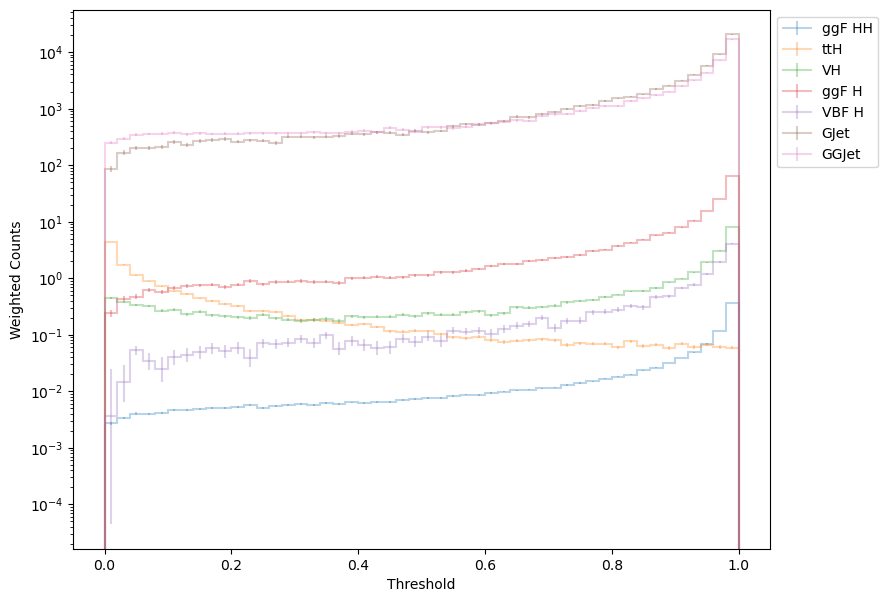

In [17]:
plt.figure(figsize=(9,7))

plot_score_from_eval_all(all_samples, all_weights)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Threshold')
plt.ylabel('Weighted Counts')
plt.yscale('log')
plt.show()

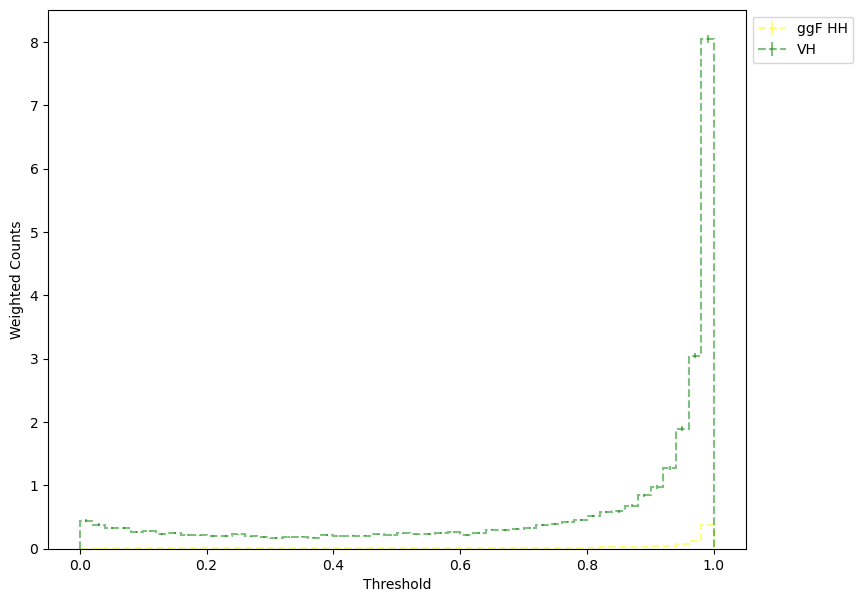

In [ ]:
plt.figure(figsize=(9,7))

# plot_score_from_IN_perf(IN_weights)
plot_score_from_eval(vh_sig, vh_weights, bkg_label='VH')
# plot_score_from_eval(ggfh_sig, ggfh_weights, bkg_label='ggF H', no_sig=True)
# plot_score_from_eval(vbfh_sig, vbfh_weights, bkg_label='VBF H', no_sig=True)
# plot_score_from_eval(gjet_sig, gjet_weights, bkg_label='GJet pt > 40', no_sig=True)
# plot_score_from_eval(ggjet_sig, ggjet_weights, bkg_label='GG + 3Jet', no_sig=True)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Threshold')
plt.ylabel('Weighted Counts')
plt.show()

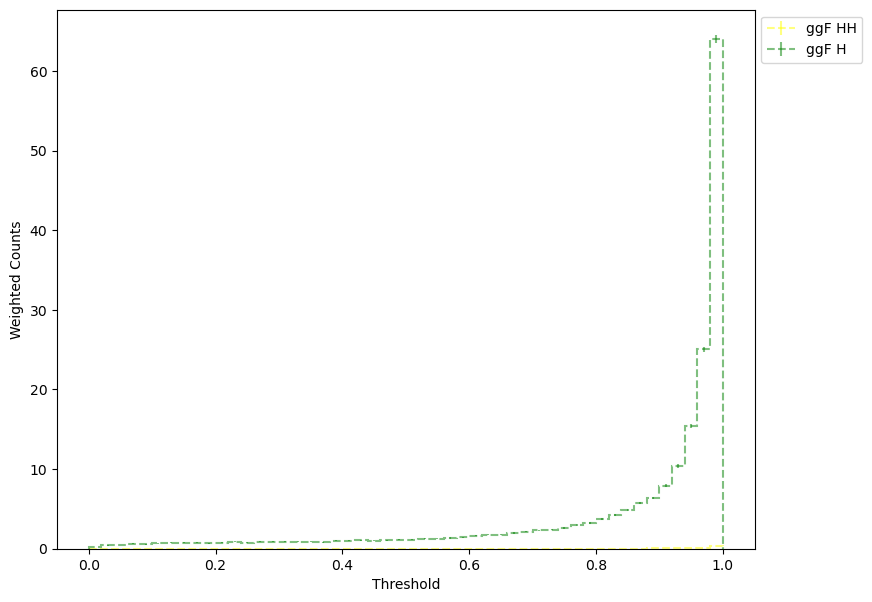

In [10]:
plt.figure(figsize=(9,7))

# plot_score_from_IN_perf(IN_weights)
plot_score_from_eval(ggfh_sig, ggfh_weights, bkg_label='ggF H')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Threshold')
plt.ylabel('Weighted Counts')
plt.show()

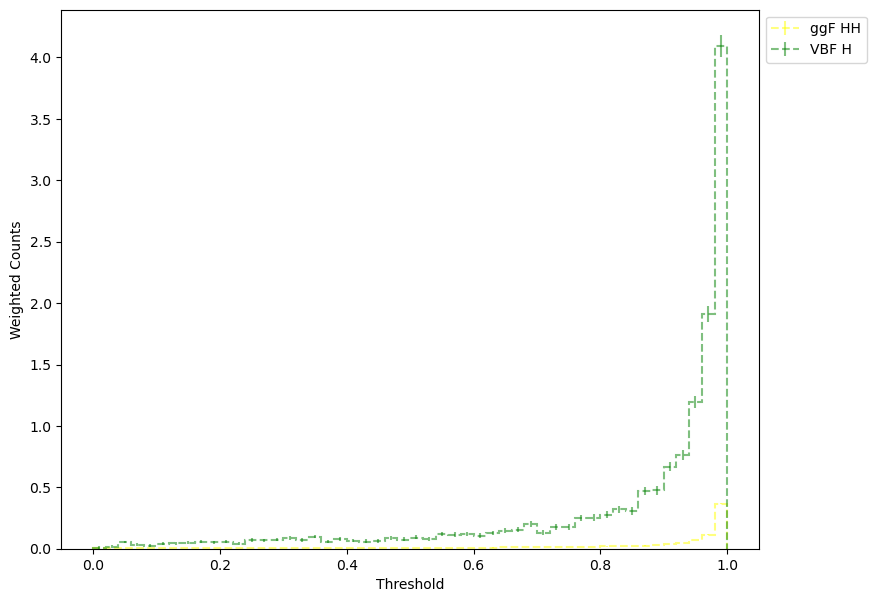

In [11]:
plt.figure(figsize=(9,7))

# plot_score_from_IN_perf(IN_weights)
plot_score_from_eval(vbfh_sig, vbfh_weights, bkg_label='VBF H')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Threshold')
plt.ylabel('Weighted Counts')
plt.show()

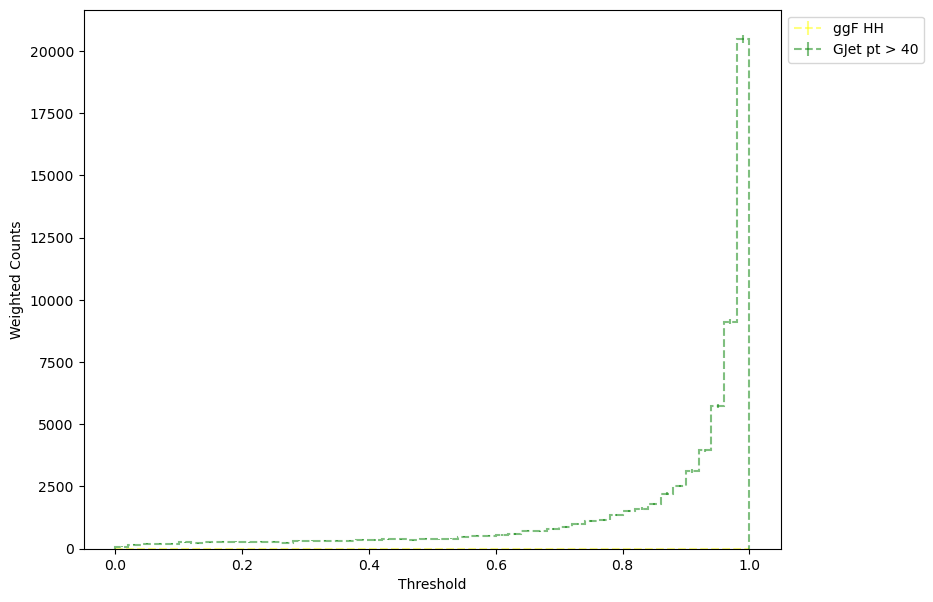

In [12]:
plt.figure(figsize=(9,7))

# plot_score_from_IN_perf(IN_weights)
plot_score_from_eval(gjet_sig, gjet_weights, bkg_label='GJet pt > 40')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Threshold')
plt.ylabel('Weighted Counts')
plt.show()

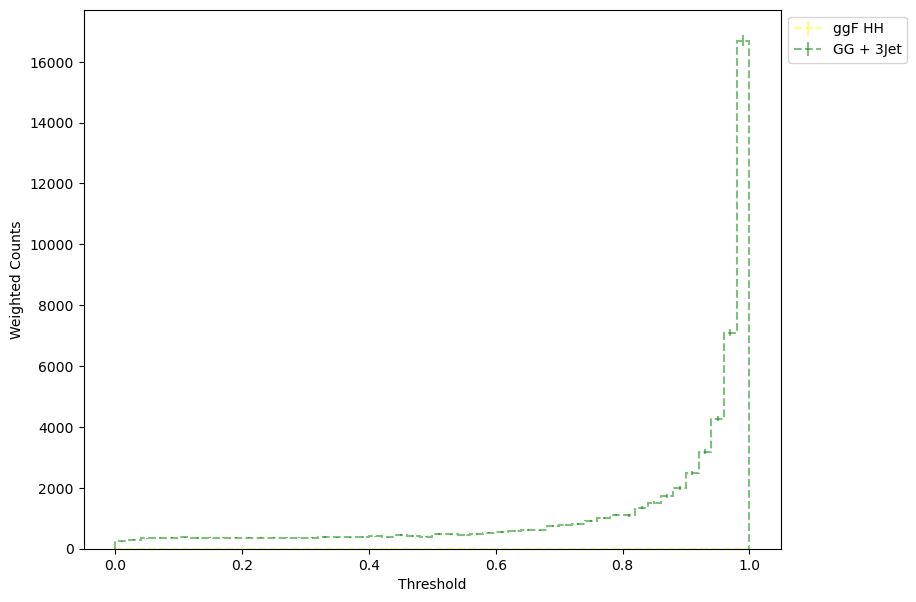

In [13]:
plt.figure(figsize=(9,7))

# plot_score_from_IN_perf(IN_weights)
plot_score_from_eval(ggjet_sig, ggjet_weights, bkg_label='GG + 3Jet')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Threshold')
plt.ylabel('Weighted Counts')
plt.show()